Project 2 = Wholesale Customers Dataset


Goal: Goal of this project is to best describe the variation in the different types of customers that a
wholesale distributor interacts with.


Task 1:
      

*   Perform EDA and any data cleaning if necessary





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Dataset=pd.read_excel("Wholesale customers data.xlsx")
print(Dataset.shape)
print(Dataset.head())

(440, 8)
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [ ]:
#to check weather we have any null data or not but we do not have any  null data
Dataset.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [ ]:
# we check for duplicate values
Dataset.duplicated().sum()

0

In [ ]:
print("Channel Quniue Values : ",Dataset.Channel.unique())
print("Region Quniue Values : ",Dataset.Region.unique())

Channel Quniue Values :  [2 1]
Region Quniue Values :  [3 1 2]


In [ ]:
Dataset.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [26]:
#Defining the categorical and continuous features of the wholesale dataset

categorical_cols = ['Channel', 'Region']
continuous_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

#Counting the number of unique values in the 'Channel' column of the wholesale dataset
#This is useful for understanding the distribution of values in the column

Dataset['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

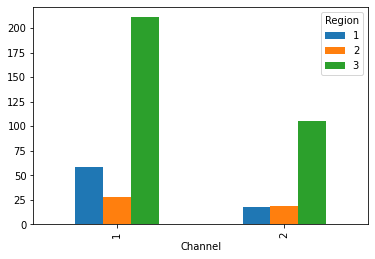

Region    1   2    3
Channel             
1        59  28  211
2        18  19  105


In [48]:
def categorical_multi(i,j):
    pd.crosstab(Dataset[i],Dataset[j]).plot(kind='bar')
    plt.show()
    print(pd.crosstab(Dataset[i],Dataset[j]))

categorical_multi(i='Channel',j='Region') 

<AxesSubplot:>

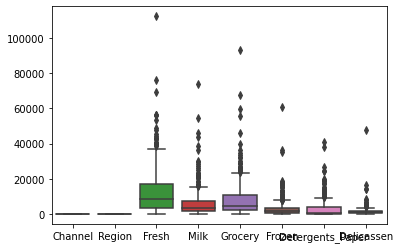

In [49]:
import seaborn as sns
sns.boxplot(data=Dataset)

In [51]:
# Replace outliers with median value
for col in Dataset.columns:
# Check if the column is numeric and not an object type.
  if Dataset[col].dtype != 'object':
  # Calculate the median and standard deviation of the column.
    median = Dataset[col].median()
    std = Dataset[col].std()
    # Identify the outliers in the column by comparing the absolute difference of each value to the median
    # with three times the standard deviation of the column.
    outliers = (Dataset[col] - median).abs() > 3*std
    # Replace the outliers with the median value of the column.
    Dataset.loc[outliers, col] = median
print(Dataset.shape)

(440, 8)


array([[<AxesSubplot:title={'center':'Channel'}>,
        <AxesSubplot:title={'center':'Region'}>,
        <AxesSubplot:title={'center':'Fresh'}>],
       [<AxesSubplot:title={'center':'Milk'}>,
        <AxesSubplot:title={'center':'Grocery'}>,
        <AxesSubplot:title={'center':'Frozen'}>],
       [<AxesSubplot:title={'center':'Detergents_Paper'}>,
        <AxesSubplot:title={'center':'Delicassen'}>, <AxesSubplot:>]],
      dtype=object)

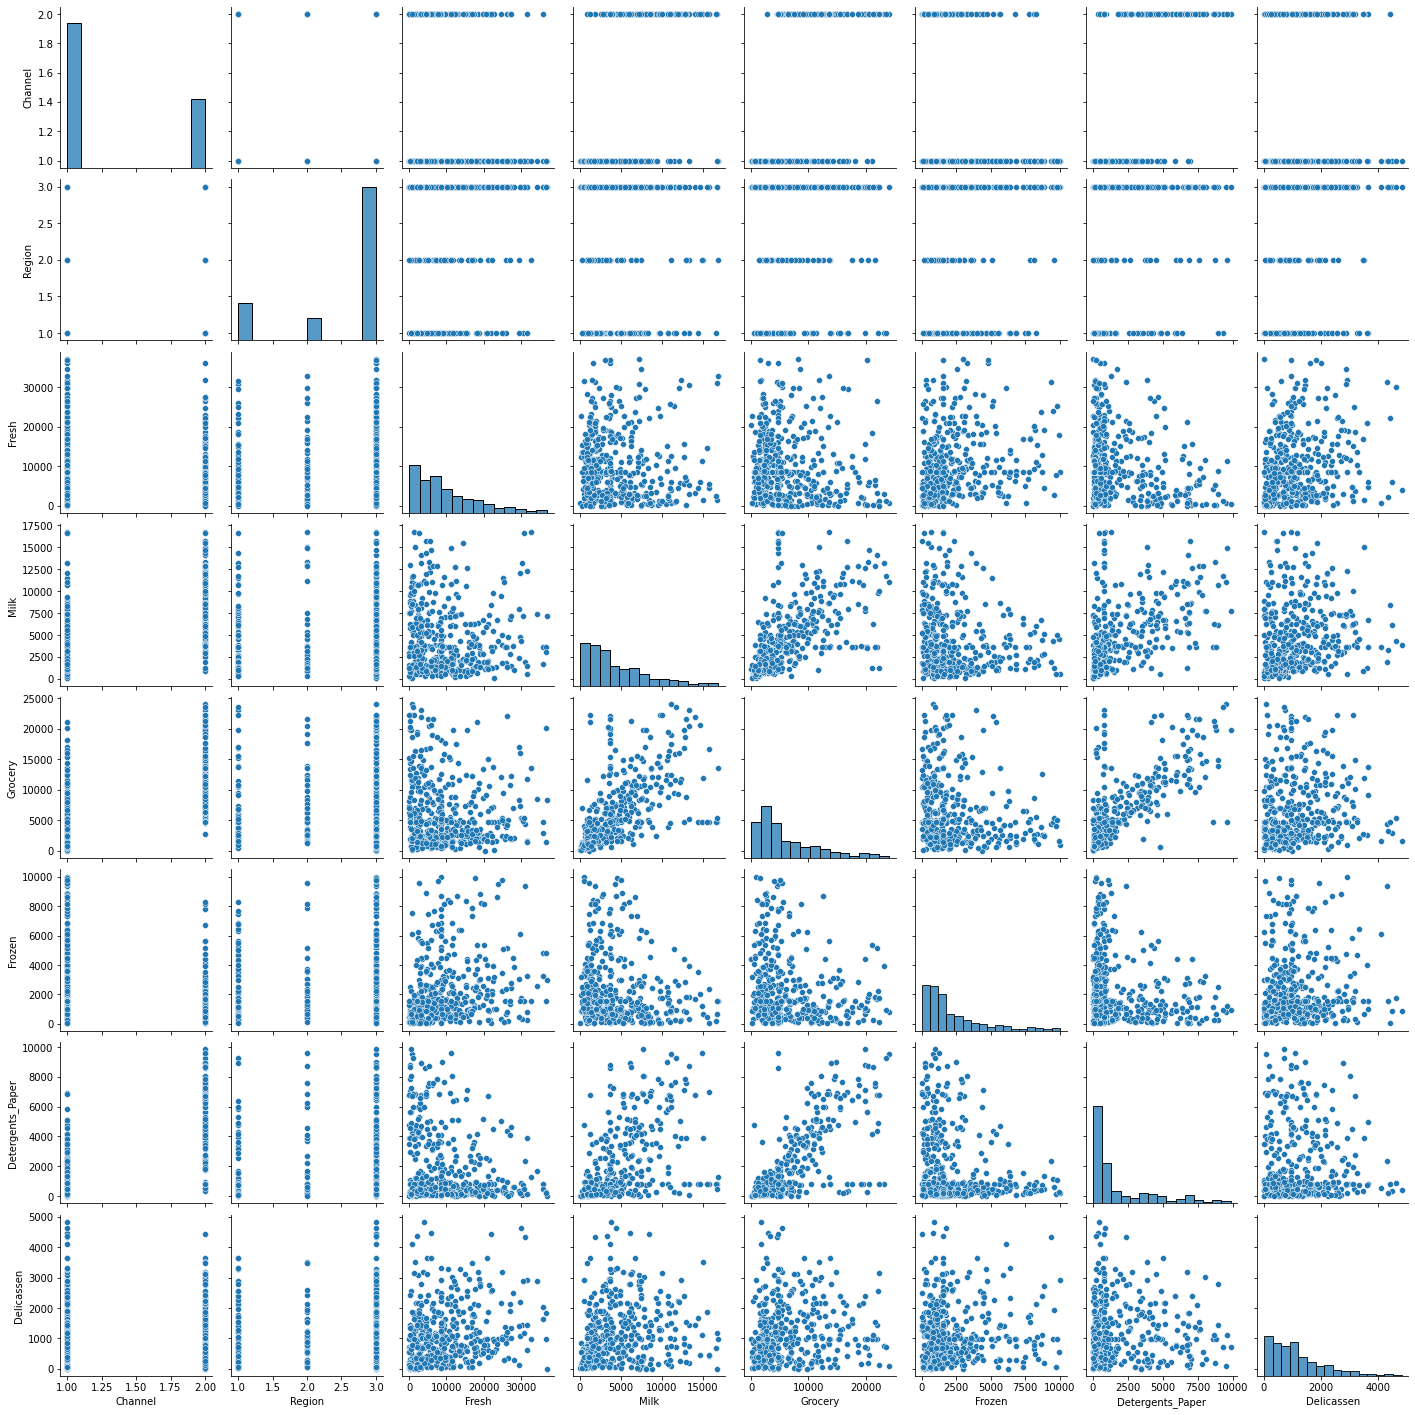

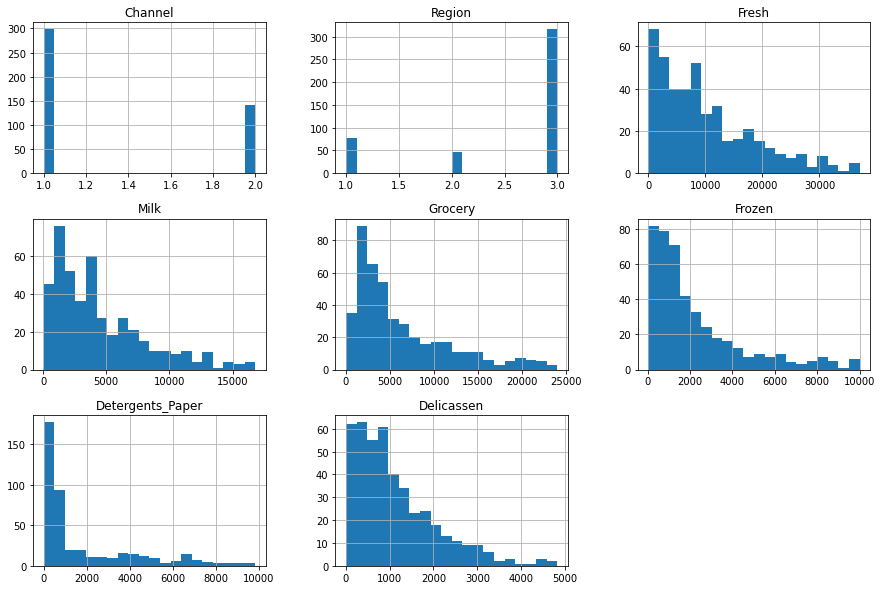

In [52]:
# Visualize the data using scatterplots for each pair of columns in the dataset.
sns.pairplot(data=Dataset)

# Visualize the data using histograms for each column in the dataset, specifying the size of the figure and the number of bins
Dataset.hist(figsize=(15,10), bins=20)

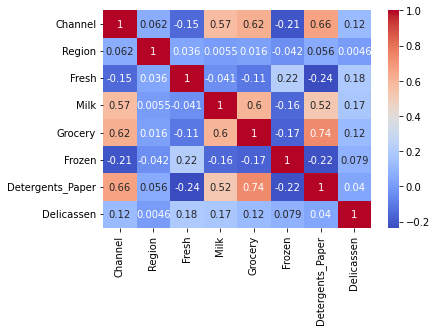

In [55]:
# Calculate the correlation between each pair of columns in the dataframe.
Dataset.corr()

# Select two groups based on the values of the 'Channel' column, and extract the 'Grocery' column for each group.
from scipy.stats import ttest_ind

part1 = Dataset[Dataset.Channel == 1]['Grocery']
part2 = Dataset[Dataset.Channel == 2]['Grocery']

#Perform a two-sample t-test between the two groups.

ttest_ind(part1, part2)

sns.heatmap(Dataset.corr(), annot=True, cmap='coolwarm')
plt.show()

Based on the correlation heatmap plot, we can observe that several pairs of features in the dataset exhibit correlation to some degree. Specifically, the pairs with the highest correlation coefficients are:

*   Grocery and Detergents_Paper, with a correlation coefficient of 0.74, indicating a very strong positive correlation.
*   Milk and Groceries, with a correlation coefficient of 0.53, indicating a moderate positive correlation.


*   Milk and Detergents_Paper, with a correlation coefficient of 0.60, indicating a moderate positive correlation.










Task 2 :
Implement Feature Scaling to Normalize the data(compare the histogram/KDE for MinMaxScaler
and StandardScaler). Choose one of the Scaler to proceed ahead and provide reasoning as to
why it was selected?

In [57]:

from sklearn.preprocessing import StandardScaler

#Instantiate a StandardScaler object
Standard_scaler = StandardScaler()
#Fit the scaler to the dataset and transform it to obtain the scaled version of the dataset.
Dateset_scaled = Standard_scaler.fit_transform(Dataset)
Dataset_scaled = pd.DataFrame(Dateset_scaled, columns=Dataset.columns)
print(Dataset_scaled.head())

    Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  1.448652  0.590668  0.312319  1.414779  0.229874 -0.909948   
1  1.448652  0.590668 -0.352531  1.456675  0.597311 -0.221098   
2  1.448652  0.590668 -0.435934  1.184080  0.252392  0.065033   
3 -0.690297  0.590668  0.382926 -0.886775 -0.381606  1.844562   
4  1.448652  0.590668  1.490615  0.259649  0.163416  0.736973   

   Detergents_Paper  Delicassen  
0          0.344521    0.211050  
1          0.608533    0.677287  
2          0.703645   -0.186262  
3         -0.579734    0.690060  
4         -0.038062   -0.186262  


In [59]:
#Now we will create the list of features to scale

from sklearn.preprocessing import MinMaxScaler, StandardScaler
flist = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [61]:
#Import the MinMaxScaler class from scikit-learn.
MinMaxScaler = MinMaxScaler()
#Select a subset of columns from the original dataset and fit the scaler to it, then transform it to obtain the scaled version of the subset.
Dataset_scaled1 = MinMaxScaler.fit_transform(Dataset[flist])
Dataset_scaled1 = pd.DataFrame(Dataset_scaled1, columns=flist)

In [69]:
# Create a StandardScaler object and scale the selected features:
StandardScaler = StandardScaler()
#Select a subset of columns from the original dataset and fit the scaler to it, then transform it to obtain the scaled version of the subset.
Dataset_scaled2 = StandardScaler.fit_transform(Dataset[flist])
Dataset_scaled2 = pd.DataFrame(Dataset_scaled2, columns=flist)

TypeError: ignored

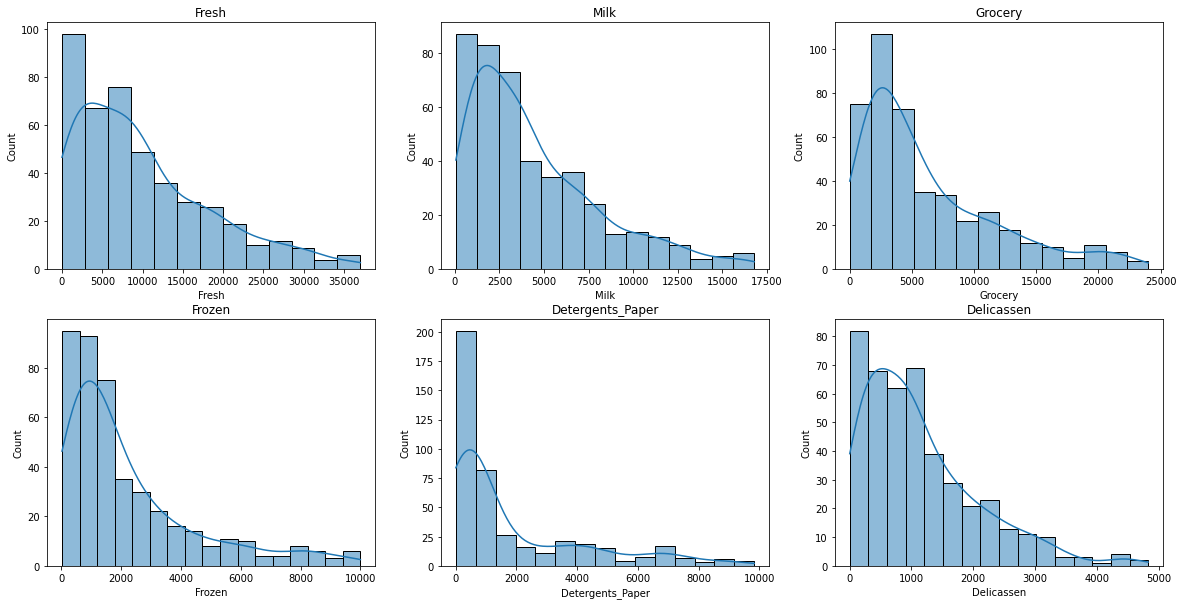

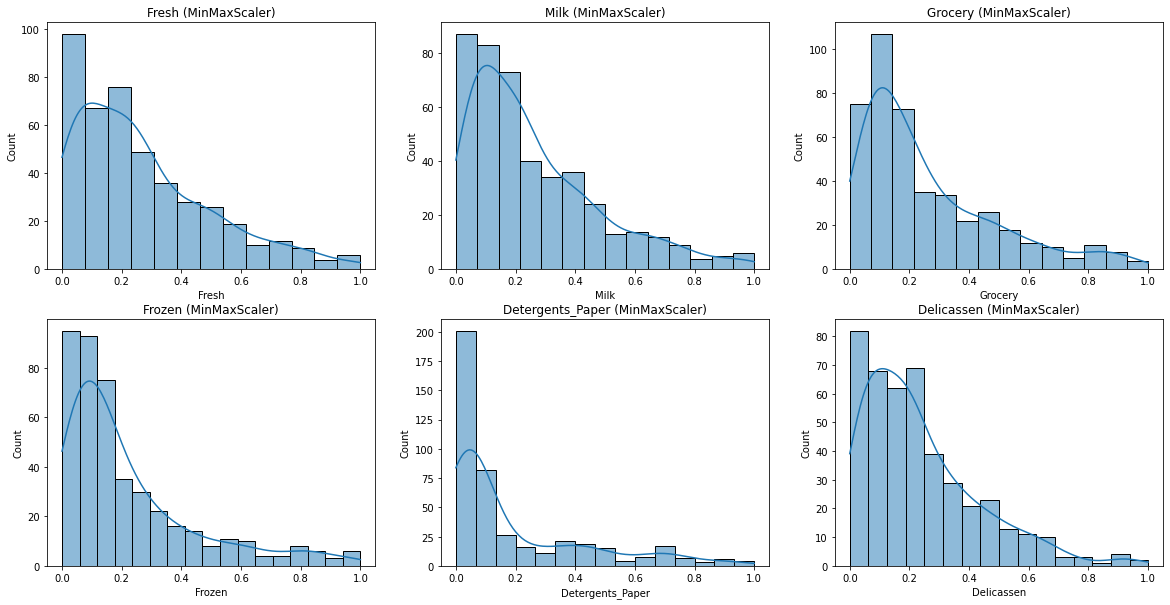

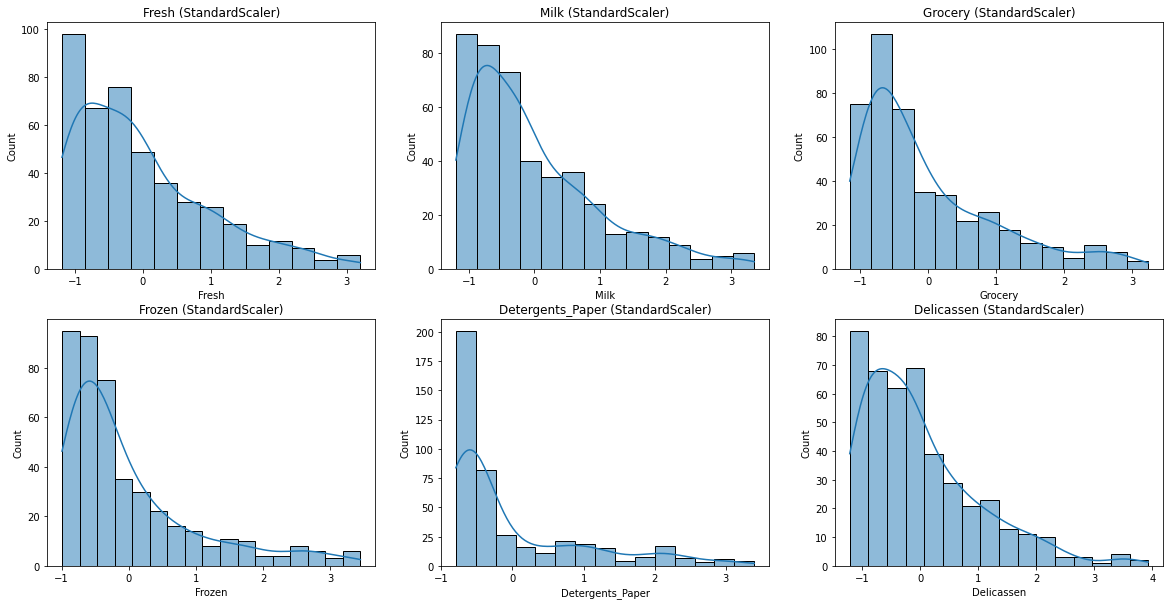

In [63]:
# Plot histograms and KDEs of the original variables
plt.figure(figsize=(20, 10))

#Loop through each variable in the feature list and create a subplot for each one.
for i, j in enumerate(flist):
    plt.subplot(2, 3, i+1)
    sns.histplot(Dataset[j], kde=True)
    plt.title(j)

#Plot histograms and KDEs of the subset scaled with MinMaxScaler.    
plt.figure(figsize=(20, 10))

for i, j in enumerate(flist):
    plt.subplot(2, 3, i+1)
    sns.histplot(Dataset_scaled1[j], kde=True)
    plt.title(j + " (MinMaxScaler)")

#Plot histograms and KDEs of the entire dataset scaled with StandardScaler.
plt.figure(figsize=(20, 10))

for i, j in enumerate(flist):
    plt.subplot(2, 3, i+1)
    sns.histplot(Dataset_scaled2[j], kde=True)
    plt.title(j + " (StandardScaler)")
    
plt.show()

Result:
Based on the histograms and KDEs, we can observe that the variables scaled using StandardScaler appear to be more normally distributed when compared to those scaled using MinMaxScaler. As a result, we can select StandardScaler as our preferred method for further analysis. One advantage of using StandardScaler is that it scales the variables to have a mean of zero and a standard deviation of one, making it well-suited for algorithms that assume normally distributed data, such as linear regression or logistic regression.

In [70]:
#now we will use standardscaler ony as it give best normalization over all features
StandardScaler = StandardScaler()
df_scaled = StandardScaler.fit_transform(Dataset[flist])
df_scaled = pd.DataFrame(df_scaled, columns=flist)
df_scaled.head()

TypeError: ignored

Task 3:  Find optimal number of features using RFECV and show the plot between Number of features
selected vs Cross validation score (use channel as target variable)

In [71]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [72]:
# Drop the 'Channel' column from the dataset to obtain the predictor variables.
X = Dataset.drop('Channel', axis=1)
# Set the target variable to be the 'Channel' column.
y = Dataset['Channel']

#Convert into Binary form
y[y==2]=0
y[y==1]=1
y.head()

<ipython-input-72-2f626f42d2e1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y==2]=0
<ipython-input-72-2f626f42d2e1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y==1]=1


0    0
1    0
2    0
3    1
4    0
Name: Channel, dtype: int64

In [73]:
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=32)

#we define four machine learning models - Linear Regression, K-Nearest Neighbors (KNN), Gradient Boosting Classifier (GBC), and Random Forest Classifier (RFC)
lr = LinearRegression()
knn = KNeighborsClassifier()
print("Fit raw features:")
print(" LR:", lr.fit(X_train, y_train).score(X_test, y_test))
print("KNN:", knn.fit(X_train, y_train).score(X_test, y_test))
print("GBC: ", GradientBoostingClassifier().fit(X_train, y_train).score(X_test, y_test))
print("RFC: ", RandomForestClassifier().fit(X_train, y_train).score(X_test, y_test))
#The score represents the accuracy of the model on the test data.
#We print out the scores for each model to compare their performance on the raw (unscaled) features of the data.

Fit raw features:
 LR: 0.5568071212426441
KNN: 0.8909090909090909
GBC:  0.8727272727272727
RFC:  0.9272727272727272


here we get the best result with random forest thus we will fit the data into random forest model

In [74]:
RandomForest = RandomForestClassifier()
rfecv = RFECV(estimator=RandomForest)
rfecv.fit(X, y)

RFECV(estimator=RandomForestClassifier())

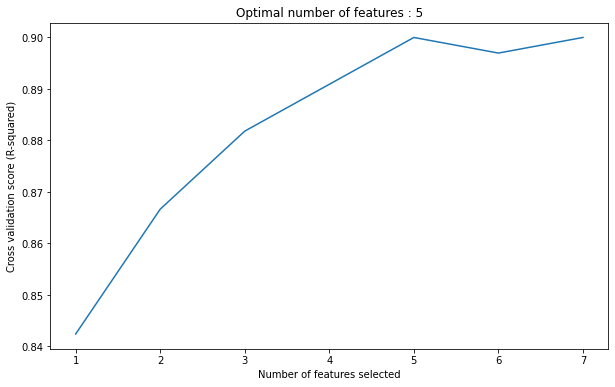

In [76]:
# Import Recursive Feature Elimination and Cross Validated (RFECV) function
from sklearn.feature_selection import RFECV

# Create an estimator object, in this case, Random Forest Classifier
estimator = RandomForestClassifier(random_state=32)

# Create a RFECV object
rfecv = RFECV(estimator=estimator, step=1, cv=5, scoring='accuracy')

# Fit the RFECV object to the data
rfecv.fit(X_train, y_train)

# Plot the cross validation score (R-squared) for each number of selected features
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (R-squared)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.title("Optimal number of features : %d" % rfecv.n_features_)
plt.show()

In [77]:
# Identify the optimal number of features:
print("Optimal number of features: %d" % rfecv.n_features_)

Optimal number of features: 5


In [78]:
#we will use RFECV using GradientBoostingClassifier with pipleline

GBC = GradientBoostingClassifier()
rfecv = RFECV(estimator=GradientBoostingClassifier())

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import numpy as np

In [81]:
# Create a pipeline for feature selection and modeling using Gradient Boosting Classifier
pipe = Pipeline([('Feature Selection', rfecv), ('Model', GBC)])

# Define cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)

# Evaluate pipeline performance using cross-validation
n_scores = cross_val_score(pipe, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# Compute and print the average accuracy score across all cross-validation folds
np.mean(n_scores)

0.9018181818181817

In [82]:
pipe.fit(X,y)

Pipeline(steps=[('Feature Selection',
                 RFECV(estimator=GradientBoostingClassifier())),
                ('Model', GradientBoostingClassifier())])

In [83]:
rfecv.support_

array([False, False,  True,  True,  True,  True,  True])

In [84]:
rfecv_Data = pd.DataFrame(rfecv.ranking_, index=X.columns, columns = ['Rank']).sort_values(by='Rank', ascending=True)
rfecv_Data.head(10)

,Rank
Milk,1
Grocery,1
Frozen,1
Detergents_Paper,1
Delicassen,1
Fresh,2
Region,3


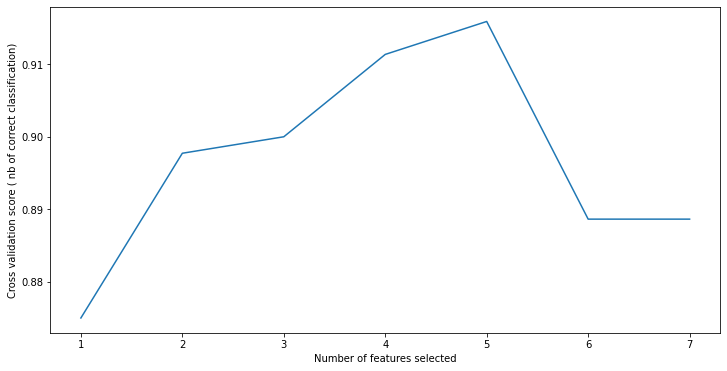

In [85]:
# Import the necessary library
import matplotlib.pyplot as plt

# Create a new figure with size 12 inches by 6 inches
plt.figure(figsize=(12,6))

# Set the x-axis label
plt.xlabel("Number of features selected")

# Set the y-axis label
plt.ylabel("Cross validation score ( nb of correct classification)")

# Plot the mean test scores for each number of features selected
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])

# Display the plot
plt.show()


Here From Graph it it clear that Milk, Grocery, Frozen, Detergents_Paper and Delicassen are optimal features

Task 4 :
Implement KMeans Clustering for K=2 to K=15 and based on elbow method identify what is the
optimum number of clusters


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

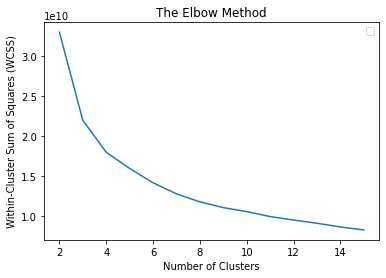

In [86]:
# Import the necessary libraries
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Create empty lists to store the silhouette scores, Calinski-Harabasz scores, and within-cluster sum of squares (WCSS) for each k
silhouette_scores = []
ch_scores = []
wcss=[]

# Loop over different values of k
for num_clusters in range(2, 16):
    # Create a KMeans model with k clusters and fit it to the data
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    
    # Get the labels assigned to each point and calculate the silhouette score and Calinski-Harabasz score
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))
    ch_scores.append(calinski_harabasz_score(X, labels))
    
    # Calculate the within-cluster sum of squares and append it to the list
    wcss.append(kmeans.inertia_)

# Plot the within-cluster sum of squares as a function of k
plt.plot(range(2, 16), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')

# Show the plot
plt.legend()
plt.show()


In [87]:
# Create a KMeans clustering model with 6 clusters and set the random seed to 111
kmeans = KMeans(n_clusters = 6, random_state = 111)

# Fit the KMeans model to the data in X and obtain the cluster assignments for each data point
# The variable y_means contains the cluster labels for each data point
y_means = kmeans.fit(X)

y_means

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=111)

In [89]:
# Print the within-cluster sum of squares (SSE) for the KMeans model
# The SSE is a measure of the quality of the clustering
print('SSE: ', kmeans.inertia_)

# Print the coordinates of the centroids for the clusters
# The centroids represent the "center" of each cluster
print('\nCentroids: \n', kmeans.cluster_centers_)

SSE:  14179735686.463182

Centroids: 
 [[2.47619048e+00 4.74830952e+03 8.81226190e+03 1.85532619e+04
  1.42857143e+03 5.90271429e+03 1.21927381e+03]
 [2.47058824e+00 9.36310504e+03 2.45514286e+03 3.22846849e+03
  2.77496218e+03 7.21962185e+02 9.77474790e+02]
 [2.57746479e+00 4.84594366e+03 7.98626761e+03 9.77119718e+03
  1.48611972e+03 4.05536268e+03 1.20322887e+03]
 [2.65853659e+00 2.87169268e+04 5.97285366e+03 7.53959756e+03
  2.98470732e+03 1.30574390e+03 1.54095122e+03]
 [2.52702703e+00 1.81364595e+04 3.11859459e+03 4.20468243e+03
  2.72181757e+03 9.79506757e+02 1.32395608e+03]
 [2.60215054e+00 2.55056989e+03 2.74724194e+03 3.19272581e+03
  1.87499462e+03 7.88903226e+02 9.39483871e+02]]


In [90]:
# Count the number of data points in each cluster
# We first create a Pandas Series object from the cluster labels using pd.Series()
# Then, we use the value_counts() method to count the number of data points in each unique cluster
# The resulting Series contains the counts of data points in each cluster, sorted in descending order
pd.Series(kmeans.labels_).value_counts()

1    119
5     93
4     74
2     71
0     42
3     41
dtype: int64

Result: We can clearly say that the total optimum number of clusters is 5

Task 5 : Implement PCA with number of original features to answer how much variance is explained by
first 2 components and by first 4 components and visualize the clusters in the data

Variance explained by first 2 components: 0.8836678186754318
Variance explained by first 4 components: 0.9768069350072832


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


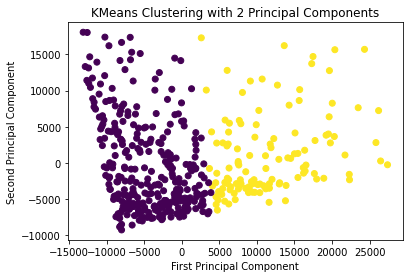

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


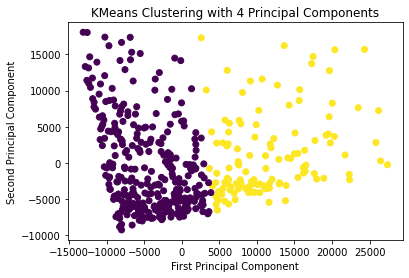

In [91]:
# Import required libraries
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt



# Apply PCA with 2 and 4 components to the dataset
pca_2 = PCA(n_components=2) # Create a PCA model with 2 components
pca_4 = PCA(n_components=4) # Create a PCA model with 4 components
data_pca_2 = pca_2.fit_transform(X) 
data_pca_4 = pca_4.fit_transform(X) 

# Calculate the variance explained by the first 2 and 4 components
var_2 = np.sum(pca_2.explained_variance_ratio_) 
var_4 = np.sum(pca_4.explained_variance_ratio_) 

# Print the variance explained by each PCA model
print("Variance explained by first 2 components:", var_2)
print("Variance explained by first 4 components:", var_4)

# Apply KMeans clustering with 2 clusters to the PCA-transformed data
kmeans_2 = KMeans(n_clusters=2, random_state=42) 
kmeans_2.fit(data_pca_2) 
labels_2 = kmeans_2.labels_ # Get the cluster labels for the 2-component PCA-transformed data

# Visualize the clusters in the data using a scatter plot
plt.scatter(data_pca_2[:, 0], data_pca_2[:, 1], c=labels_2) # Create a scatter plot with the 2-component PCA-transformed data and the cluster labels
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component') 
plt.title('KMeans Clustering with 2 Principal Components') # Set the plot title
plt.show() # Display the plot

# Apply KMeans clustering with 2 clusters to the PCA-transformed data
kmeans_4 = KMeans(n_clusters=2, random_state=42) 
kmeans_4.fit(data_pca_4) 
labels_4 = kmeans_4.labels_ # Get the cluster labels for the 4-component PCA-transformed data

# Visualize the clusters in the data using a scatter plot
plt.scatter(data_pca_4[:, 0], data_pca_4[:, 1], c=labels_4) # Create a scatter plot with the 4-component PCA-transformed data and the cluster labels
plt.xlabel('First Principal Component') 
plt.ylabel('Second Principal Component') 
plt.title('KMeans Clustering with 4 Principal Components') # Set the plot title
plt.show() # Display the plot


Result: The variance explained by the first 2 principal components is 0.88, indicating that the majority of the data's variability is captured by these components. However, using the first 4 principal components captures even more variability, with a variance of 0.97. This suggests that including additional principal components may be useful for further improving the accuracy of the model or the clustering algorithm.

Task 6: Implement XGBoost Classifier with 5 Fold CV and report the performance metrics

In [92]:
# Import required libraries
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Load the data from the CSV file
# df = pd.read_csv('wholesale_customers_data.csv')

# # Separate the input features and target variable
X = Dataset.drop(['Channel'], axis=1) # Extract the input features by dropping the 'Channel' column
y = Dataset['Channel'] # Extract the target variable

# Define the XGBoost classifier model
xgb_model = XGBClassifier(eval_metric='mlogloss')

# Define the 5-fold cross-validation method
cv_method = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform 5-fold cross-validation and calculate performance metrics
accuracy_scores = cross_val_score(xgb_model, X, y, cv=cv_method, scoring='accuracy')
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(cross_val_score(xgb_model, X, y, cv=cv_method, scoring='precision'))
mean_recall = np.mean(cross_val_score(xgb_model, X, y, cv=cv_method, scoring='recall'))
mean_f1 = np.mean(cross_val_score(xgb_model, X, y, cv=cv_method, scoring='f1'))# Calculate mean F1 score

# Print the performance metrics
print("Mean Accuracy Score:", mean_accuracy)
print("Mean Precision Score:", mean_precision)
print("Mean Recall Score:", mean_recall)
print("Mean F1 Score:", mean_f1)


Mean Accuracy Score: 0.9045454545454547
Mean Precision Score: 0.9381358715315467
Mean Recall Score: 0.9193785310734462
Mean F1 Score: 0.9285683735542852


The input features are separated from the target variable, and the XGBoost model is defined with the evaluation metric 'mlogloss'.

The StratifiedKFold method is used to define the 5-fold cross-validation method.

Cross-validation is performed using the XGBoost model, input features, and target variable. Accuracy, precision, recall, and F1 score are calculated using their respective scoring methods.

The mean scores are calculated for each performance metric and printed to the console.

The mean accuracy score is 0.9045, mean precision score is 0.9381, mean recall score is 0.9194, and mean F1 score is 0.9286.

